In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [16]:
# Load the binned data from the CSV file
data = pd.read_csv('binned_data.csv')

input_data = np.load("combined_data.npz")['data']

# Separate the features (input) and labels (output)
features = input_data[:, 2:] 

# Split the data into train and validation sets
X_train, X_test, labels_train, labels_test = train_test_split(features, data, test_size=0.2, random_state=42)
labels_train = [np.array(labels_train['HII_EFF_FACTOR_bin']-1), np.array(labels_train['ION_Tvir_MIN_bin']-1), np.array(labels_train['R_BUBBLE_MAX_bin']-1)]
labels_test = [np.array(labels_test['HII_EFF_FACTOR_bin']-1), np.array(labels_test['ION_Tvir_MIN_bin']-1), np.array(labels_test['R_BUBBLE_MAX_bin']-1)]

# Reshape the input data for CNN (assuming 1D sequence data)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Scale the input data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))



In [17]:
# Load the trained model
model = load_model('./class_models/CNN_1/classification_model.h5')

In [18]:
# Evaluate the model on test data
evaluation_results = model.evaluate(X_test_scaled, labels_test, verbose=0)
test_loss = evaluation_results[0]
test_accuracy = evaluation_results[1]
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 4.701286315917969
Test Accuracy: 1.9092973470687866


In [19]:
# Predict labels for the test set
predictions = model.predict(X_test_scaled)
labels_predicted = [np.argmax(pred, axis=1) for pred in predictions]

62/62 [==============================] - 0s 2ms/step


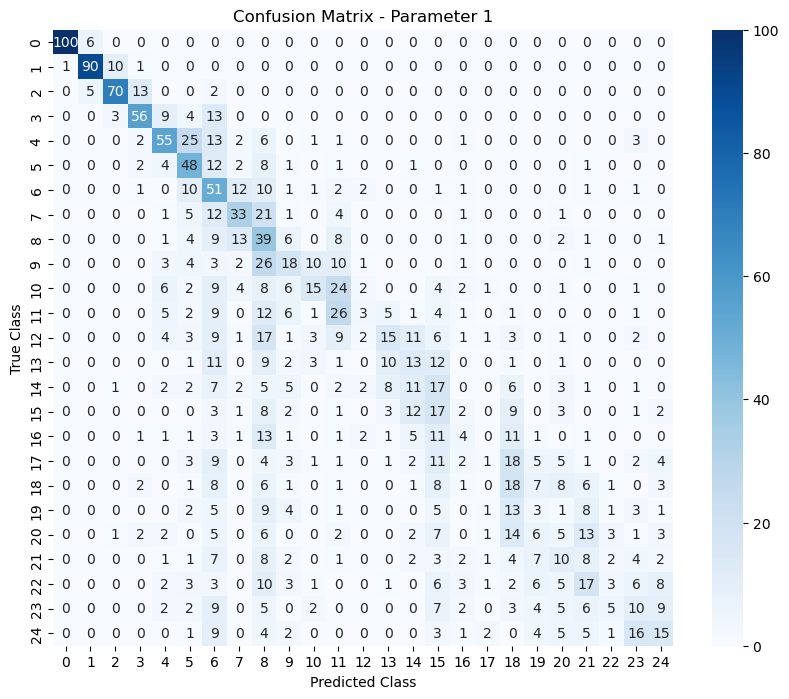

In [21]:
# Confusion Matrix - Parameter 1
confusion_mat = confusion_matrix(labels_test[0], labels_predicted[0])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Parameter 1')
plt.show()


In [22]:
# Classification Report - Parameter 1
classification_rep = classification_report(labels_test[0], labels_predicted[0])
print("Classification Report - Parameter 1:\n", classification_rep)

Classification Report - Parameter 1:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       106
           1       0.89      0.88      0.89       102
           2       0.82      0.78      0.80        90
           3       0.70      0.66      0.68        85
           4       0.56      0.50      0.53       109
           5       0.39      0.60      0.47        80
           6       0.23      0.54      0.32        94
           7       0.45      0.42      0.43        79
           8       0.17      0.46      0.24        85
           9       0.28      0.23      0.25        79
          10       0.39      0.18      0.24        85
          11       0.27      0.34      0.30        77
          12       0.14      0.02      0.04        89
          13       0.23      0.16      0.19        64
          14       0.18      0.15      0.16        75
          15       0.14      0.27      0.18        64
          16       0.15      0.07      0.10

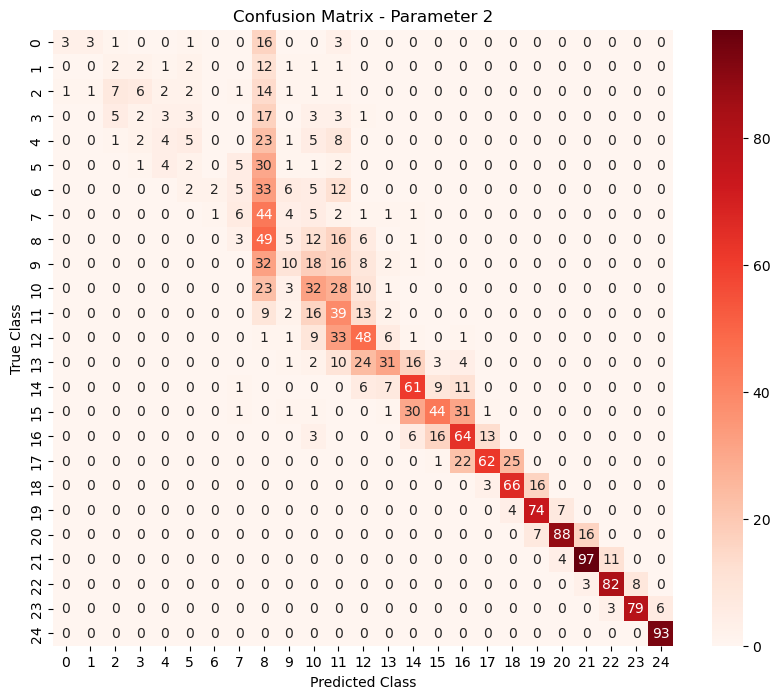

In [23]:
# Confusion Matrix - Parameter 2
confusion_mat = confusion_matrix(labels_test[1], labels_predicted[1])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Parameter 2')
plt.show()

In [25]:
# Classification Report - Parameter 2
classification_rep = classification_report(labels_test[1], labels_predicted[1])
print("Classification Report - Parameter 1:\n", classification_rep)

Classification Report - Parameter 1:
               precision    recall  f1-score   support

           0       0.75      0.11      0.19        27
           1       0.00      0.00      0.00        22
           2       0.44      0.19      0.26        37
           3       0.15      0.05      0.08        37
           4       0.29      0.08      0.13        49
           5       0.12      0.04      0.06        46
           6       0.67      0.03      0.06        65
           7       0.27      0.09      0.14        65
           8       0.16      0.53      0.25        92
           9       0.27      0.11      0.16        87
          10       0.28      0.33      0.30        97
          11       0.22      0.48      0.31        81
          12       0.41      0.48      0.44       100
          13       0.61      0.34      0.44        91
          14       0.52      0.64      0.58        95
          15       0.60      0.40      0.48       110
          16       0.48      0.63      0.54

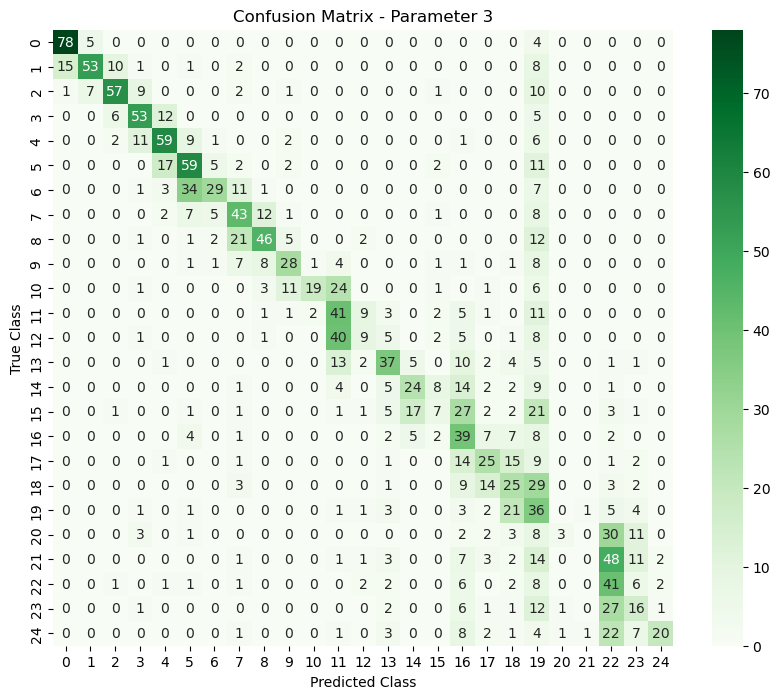

In [24]:
# Confusion Matrix - Parameter 3
confusion_mat = confusion_matrix(labels_test[2], labels_predicted[2])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Parameter 3')
plt.show()